In [ ]:
!pip install -q pandas

In [ ]:
!pip install -q matplotlib

In [ ]:
!pip install -q seaborn

In [ ]:
!pip install -q scikit-learn

In [ ]:
!pip install -q pytest-warnings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Métricas
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_raw = pd.read_csv('/content/train.csv')
df_raw.columns = [x.lower() for x in df_raw.columns]
df_raw.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_raw.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Inspecionar os Dados

In [ ]:
df_raw.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

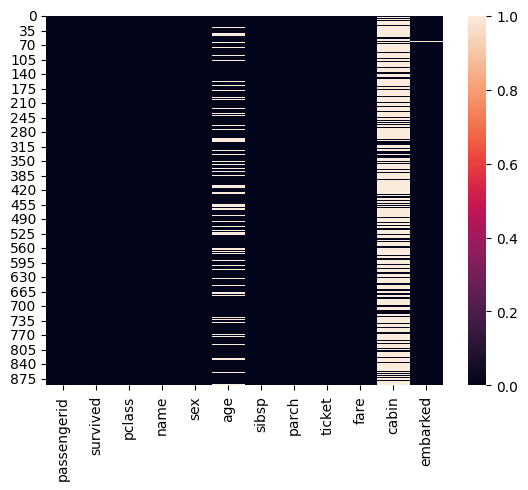

In [ ]:
sns.heatmap(df_raw.isna())
plt.show()

In [ ]:
(df_raw.isna().sum() / df_raw.shape[0]) * 100

passengerid     0.000000
survived        0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.000000
cabin          77.104377
embarked        0.224467
dtype: float64

In [ ]:
df_raw[df_raw.embarked.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df_raw.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [ ]:
df_raw.pivot_table(index='survived', columns='sex', values='passengerid', aggfunc='count')

sex,female,male
survived,,
0,81,468
1,233,109


In [ ]:
df_raw.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
df_raw[df_raw.age.isna()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


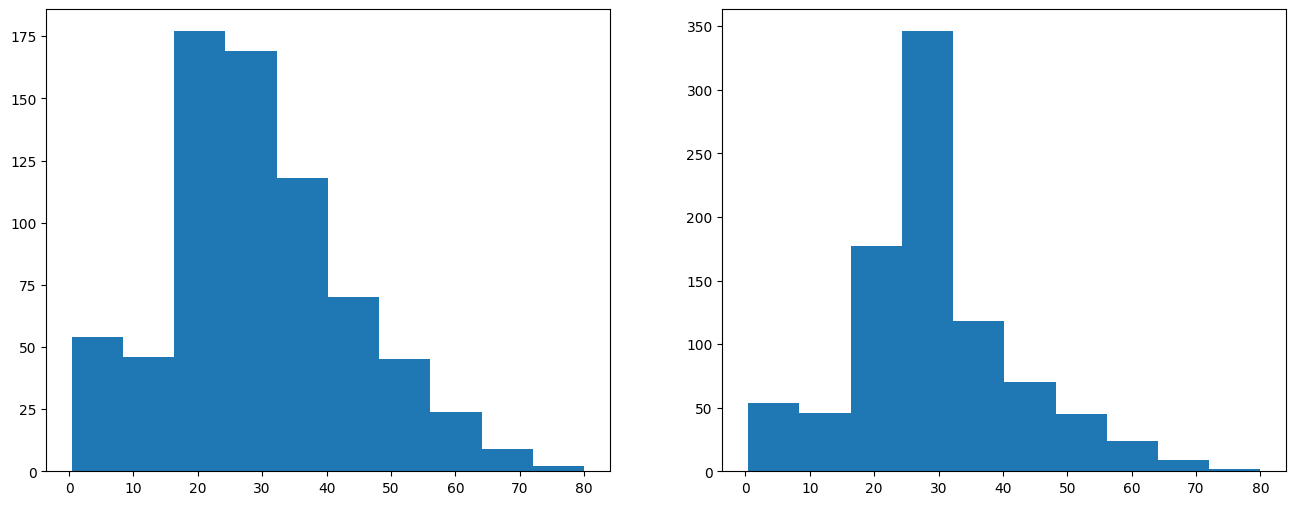

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,6), sharex=True)

ax[0].hist(df_raw.age, label='sem')
ax[1].hist(df_raw.age.fillna(df_raw.age.mean()))
plt.show()

Criar DF Processed

In [ ]:
df_processed = (
    df_raw
    .drop(['cabin', 'ticket', 'passengerid', 'name'], axis=1)
    .dropna(subset=['embarked'], how='any')
    .assign(age = lambda x: x.age.fillna(x.age.mean()))
)

df_processed

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.642093,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


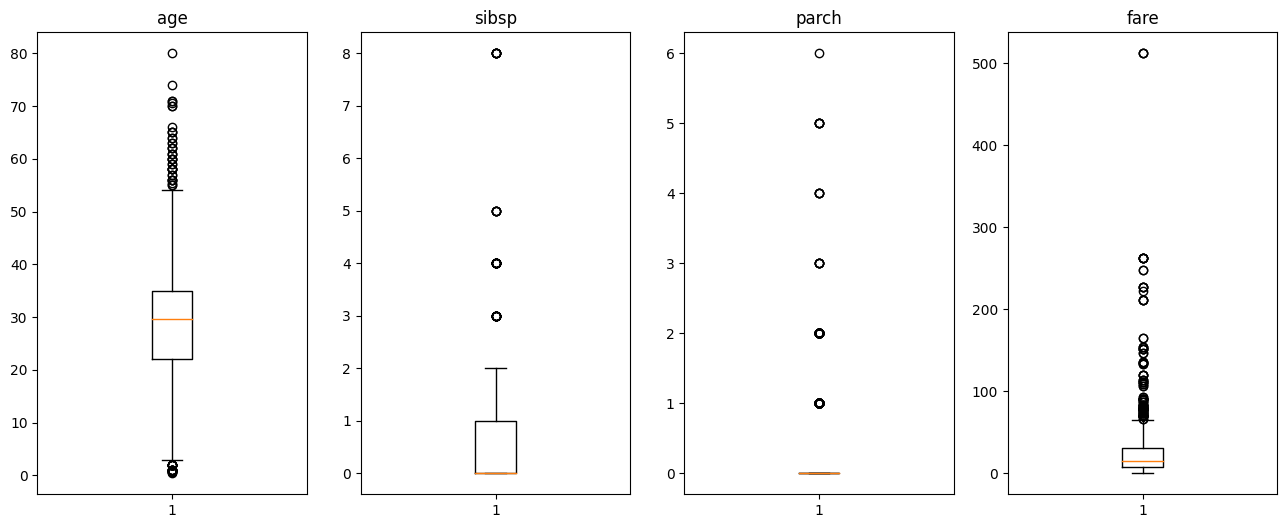

In [ ]:
ls_colunas = ['age', 'sibsp', 'parch', 'fare']

f, ax = plt.subplots(1,4, figsize=(16,6))

for idx, coluna in enumerate(ls_colunas):
  ax[idx].boxplot(df_processed[coluna])
  ax[idx].set_title(coluna)

plt.show()

In [ ]:
(df_processed.parch > 0).sum() / df_processed.shape[0]

0.23959505061867267

In [ ]:
df_processed[df_processed.parch == 0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
ls_colunas = ['age', 'sibsp', 'fare']

def detect_out(column):
  iqr = np.percentile(column, 75) - np.percentile(column, 25)
  limite_inferior = np.percentile(column, 25) - iqr * 1.5
  limite_superior = np.percentile(column, 75) + iqr * 1.5

  ls_out = []

  for value in column:
    if value < limite_inferior:
      ls_out.append(-1)
    elif value > limite_superior:
      ls_out.append(-1)
    else:
      ls_out.append(1)

  return np.array(ls_out)

In [ ]:
detect_out(df_processed.age)

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
df_analysis = (
    df_processed
    .assign(out_age = lambda x: detect_out(x.age))
    .assign(out_sibsp = lambda x: detect_out(x.sibsp))
    .assign(out_fare = lambda x: detect_out(x.fare))
    .query("out_age != -1 and out_sibsp != -1 and out_fare != -1")
    .drop(['out_age', 'out_sibsp', 'out_fare'], axis=1)
    .reset_index()
)

Analisar Correlação

In [ ]:
df_analysis.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,0,3,male,22.000000,1,0,7.2500,S
1,2,1,3,female,26.000000,0,0,7.9250,S
2,3,1,1,female,35.000000,1,0,53.1000,S
3,4,0,3,male,35.000000,0,0,8.0500,S
4,5,0,3,male,29.642093,0,0,8.4583,Q


In [ ]:
lb = LabelEncoder()
lb.fit(df_analysis.sex)

LabelEncoder()

In [ ]:
lb.transform(df_analysis.sex)

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,

In [ ]:
df_analysis['sex'] = lb.transform(df_analysis.sex)

<Axes: >

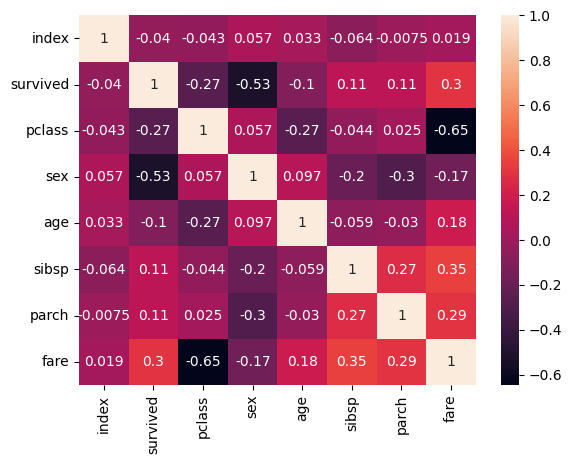

In [ ]:
sns.heatmap(df_analysis.corr(), annot=True)

In [ ]:
def find_velho(value):
  if value > 45:
    return 1
  else:
    return 0

In [ ]:
df_analysis['velho'] = df_analysis.age.apply(find_velho)

In [ ]:
df_analysis

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,velho
0,0,0,3,1,22.000000,1,0,7.2500,S,0
1,2,1,3,0,26.000000,0,0,7.9250,S,0
2,3,1,1,0,35.000000,1,0,53.1000,S,0
3,4,0,3,1,35.000000,0,0,8.0500,S,0
4,5,0,3,1,29.642093,0,0,8.4583,Q,0
...,...,...,...,...,...,...,...,...,...,...
687,886,0,2,1,27.000000,0,0,13.0000,S,0
688,887,1,1,0,19.000000,0,0,30.0000,S,0
689,888,0,3,0,29.642093,1,2,23.4500,S,0
690,889,1,1,1,26.000000,0,0,30.0000,C,0


Separação em Treino e Teste

In [ ]:
ohe_embarked_train = OneHotEncoder(sparse=False)
ohe_embarked_train.fit(df_analysis.embarked.values.reshape(-1,1))
embarked_transformed = ohe_embarked_train.transform(df_analysis.embarked.values.reshape(-1,1))
embarked_transformed = pd.DataFrame(embarked_transformed, columns=ohe_embarked_train.get_feature_names_out())

In [ ]:
ohe_class_train = OneHotEncoder(sparse=False)
ohe_class_train.fit(df_analysis.pclass.values.reshape(-1,1))
pclass_transformed = ohe_class_train.transform(df_analysis.pclass.values.reshape(-1,1))
pclass_transformed = pd.DataFrame(pclass_transformed, columns=ohe_class_train.get_feature_names_out())

In [ ]:
df_ready_to_train = (
    df_analysis
    .merge(embarked_transformed, left_index=True, right_index=True)
    .merge(pclass_transformed, left_index=True, right_index=True)
    .drop(['index','embarked', 'pclass'], axis=1))

df_ready_to_train

,survived,sex,age,sibsp,parch,fare,velho,x0_C,x0_Q,x0_S,x0_1,x0_2,x0_3
0,0,1,22.000000,1,0,7.2500,0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,26.000000,0,0,7.9250,0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0,35.000000,1,0,53.1000,0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,1,35.000000,0,0,8.0500,0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,1,29.642093,0,0,8.4583,0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0,1,27.000000,0,0,13.0000,0,0.0,0.0,1.0,0.0,1.0,0.0
688,1,0,19.000000,0,0,30.0000,0,0.0,0.0,1.0,1.0,0.0,0.0
689,0,0,29.642093,1,2,23.4500,0,0.0,0.0,1.0,0.0,0.0,1.0
690,1,1,26.000000,0,0,30.0000,0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x = df_ready_to_train.drop(['survived'], axis=1)
y = df_ready_to_train.survived

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, y_train.shape

((553, 12), (553,))

In [ ]:
x_test.shape, y_test.shape

((139, 12), (139,))

#Modelos - Treinamento (Dummy Classifier, Decision Tree,

###Dummy Classifier

In [ ]:
dm = DummyClassifier(strategy='most_frequent')
dm.fit(x_train, y_train)

DummyClassifier(strategy='most_frequent')

In [ ]:
y_pred = dm.predict(x_test)

In [ ]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1])

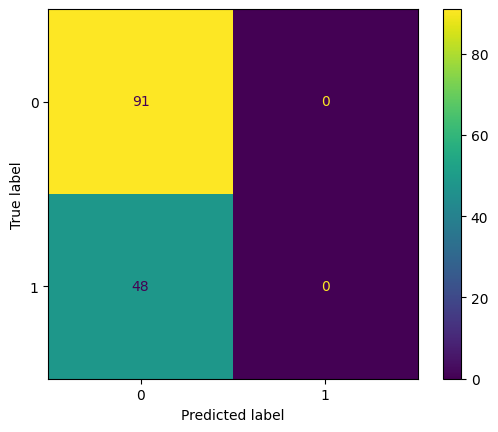

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        91
           1       0.00      0.00      0.00        48

    accuracy                           0.65       139
   macro avg       0.33      0.50      0.40       139
weighted avg       0.43      0.65      0.52       139



###Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

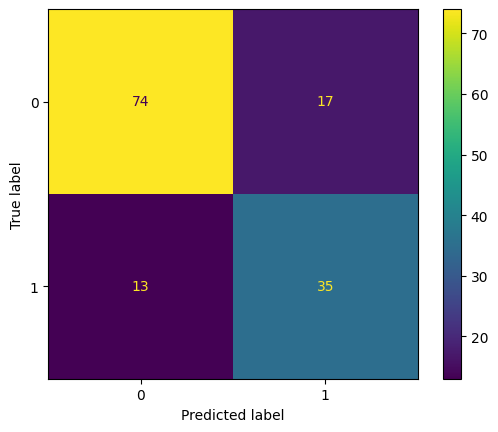

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        91
           1       0.67      0.73      0.70        48

    accuracy                           0.78       139
   macro avg       0.76      0.77      0.77       139
weighted avg       0.79      0.78      0.79       139



<BarContainer object of 12 artists>

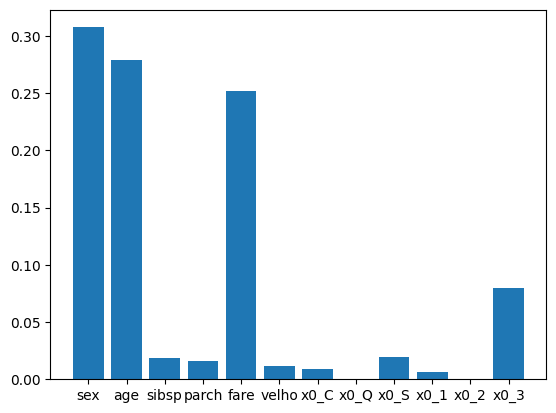

In [ ]:
plt.bar(x_train.columns, dt.feature_importances_)

###SVC

In [ ]:
for coluna in x_train.columns:
  mm = MinMaxScaler()
  mm.fit(x_train[coluna].values.reshape(-1,1))
  x_train[coluna] = mm.transform(x_train[coluna].values.reshape(-1,1))
  x_test[coluna] = mm.transform(x_test[coluna].values.reshape(-1,1))

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

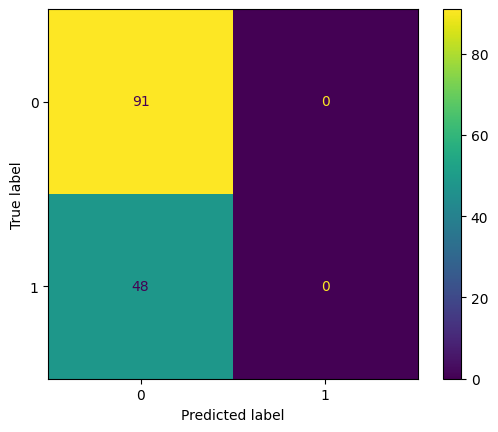

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        91
           1       0.00      0.00      0.00        48

    accuracy                           0.65       139
   macro avg       0.33      0.50      0.40       139
weighted avg       0.43      0.65      0.52       139



###Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

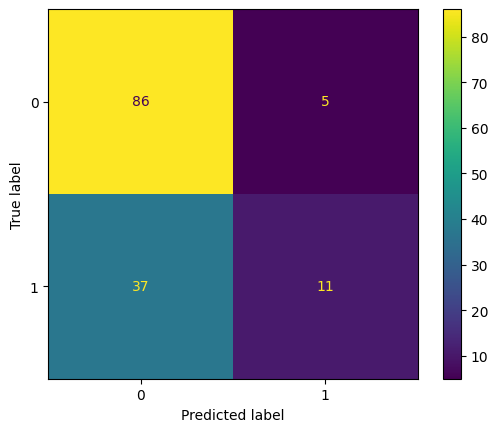

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80        91
           1       0.69      0.23      0.34        48

    accuracy                           0.70       139
   macro avg       0.69      0.59      0.57       139
weighted avg       0.70      0.70      0.64       139



Scoragem da Base de Teste

In [ ]:
x_train

,sex,age,sibsp,parch,fare,velho,x0_C,x0_Q,x0_S,x0_1,x0_2,x0_3
110,0.0,0.411765,0.5,0.000000,0.243846,0.0,0.0,0.0,1.0,0.0,0.0,1.0
82,1.0,0.686275,0.0,0.000000,0.121474,0.0,0.0,0.0,1.0,0.0,0.0,1.0
51,1.0,0.450980,1.0,0.000000,0.133269,0.0,0.0,0.0,1.0,0.0,0.0,1.0
218,1.0,0.588235,0.0,0.000000,0.133269,0.0,1.0,0.0,0.0,0.0,0.0,1.0
554,0.0,0.058824,0.0,0.166667,0.507692,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0.522394,0.0,0.000000,0.123846,0.0,0.0,0.0,1.0,0.0,0.0,1.0
106,1.0,0.666667,0.5,0.000000,0.816923,0.0,0.0,0.0,1.0,1.0,0.0,0.0
270,0.0,0.686275,0.0,0.000000,0.200000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
435,1.0,0.568627,0.0,0.000000,0.120834,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
df = pd.read_csv('/content/test.csv')
df.columns = [x.lower() for x in df.columns]

In [ ]:
colunas = list(x_train.columns[:5]) + ['pclass', 'embarked']

feats = df[colunas]
feats

,sex,age,sibsp,parch,fare,pclass,embarked
0,male,34.5,0,0,7.8292,3,Q
1,female,47.0,1,0,7.0000,3,S
2,male,62.0,0,0,9.6875,2,Q
3,male,27.0,0,0,8.6625,3,S
4,female,22.0,1,1,12.2875,3,S
...,...,...,...,...,...,...,...
413,male,NaN,0,0,8.0500,3,S
414,female,39.0,0,0,108.9000,1,C
415,male,38.5,0,0,7.2500,3,S
416,male,NaN,0,0,8.0500,3,S


In [ ]:
embarked = pd.DataFrame(ohe_embarked_train.transform(feats.embarked.values.reshape(-1,1)), columns=ohe_embarked_train.get_feature_names_out())
pclass = pd.DataFrame(ohe_class_train.transform(feats.pclass.values.reshape(-1,1)), columns=ohe_class_train.get_feature_names_out())

In [ ]:
mm = MinMaxScaler()

to_transform = (
    feats
    .assign(age = lambda x: x.age.fillna(x.age.mean()))
    .assign(fare = lambda x: x.fare.fillna(x.fare.mean()))
    .assign(velho = lambda x: x.age.apply(find_velho))
    .merge(embarked, left_index=True, right_index=True)
    .merge(pclass, left_index=True, right_index=True)
    .drop(['pclass', 'embarked'], axis=1)
    .assign(sex = lambda x: lb.transform(x.sex))
)

for coluna in to_transform.columns:
  mm.fit(to_transform[coluna].values.reshape(-1,1))
  to_transform[coluna] = mm.transform(to_transform[coluna].values.reshape(-1,1))

In [ ]:
to_transform.isna().sum()

sex      0
age      0
sibsp    0
parch    0
fare     0
velho    0
x0_C     0
x0_Q     0
x0_S     0
x0_1     0
x0_2     0
x0_3     0
dtype: int64

In [ ]:
(
    pd.DataFrame(dt.predict(to_transform), columns=['Survived'])
    .assign(Passengerid = df.passengerid)
    .loc[:, ['Passengerid', 'Survived']]
    .to_csv('Submission_Titanic_180823.csv', index=False, header=True, sep=',')

)